# Financial News and Stock Price Integration Dataset - EDA
This notebook performs comprehensive Exploratory Data Analysis (EDA) on the FNSPID dataset.
## Dataset Description
- **headline**: Article release headline/title
- **url**: Direct link to the full news article
- **publisher**: Author/creator of article
- **date**: Publication date and time (UTC-4 timezone)
- **stock**: Stock ticker symbol

In [1]:
# Import required libraries
import sys
import os
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
# Import custom modules
from data_loader import FinancialDataLoader
from eda_analyzer import FinancialEDAAnalyzer
from utils import save_analysis_results, format_large_numbers, get_data_quality_report

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [2]:
# Initialize data loader
data_path = "../data/raw_analyst_ratings.csv"
loader = FinancialDataLoader(data_path)

# Load the dataset
print("Loading dataset...")
df = loader.load_data()
print(f"Dataset loaded successfully! Shape: {df.shape}")

INFO:data_loader:Loading data from ../data/raw_analyst_ratings.csv


Loading dataset...


INFO:data_loader:Data loaded successfully. Shape: (1407328, 6)


Dataset loaded successfully! Shape: (1407328, 6)


In [3]:
# Get basic dataset information
data_info = loader.get_data_info()
print("Dataset Information:")
print(f"Shape: {data_info['shape']}")
print(f"Columns: {data_info['columns']}")
print(f"Memory Usage: {data_info['memory_usage'] / (1024**2):.2f} MB")
print("Data Types:")
for col, dtype in data_info['dtypes'].items():
    print(f"  {col}: {dtype}")

Dataset Information:
Shape: (1407328, 6)
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
Memory Usage: 634.55 MB
Data Types:
  Unnamed: 0: int64
  headline: object
  url: object
  publisher: object
  date: object
  stock: object


In [4]:
# Display sample data
print("Sample Data:")
sample_data = loader.get_sample_data(5)
display(sample_data)

Sample Data:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 2. Data Quality Assessment

In [5]:
# Generate data quality report
quality_report = get_data_quality_report(df)
print("Data Quality Report:")
print(f"Total Rows: {format_large_numbers(quality_report['total_rows'])}")
print(f"Total Columns: {quality_report['total_columns']}")
print(f"Duplicate Rows: {format_large_numbers(quality_report['duplicate_rows'])}")
print(f"Memory Usage: {quality_report['memory_usage_mb']:.2f} MB")
print("Missing Values Analysis:")
for col, missing_info in quality_report['missing_values'].items():
    if missing_info['count'] > 0:
        print(f"  {col}: {format_large_numbers(missing_info['count'])} ({missing_info['percentage']}%)")
    else:
        print(f"  {col}: No missing values")

Data Quality Report:
Total Rows: 1.4M
Total Columns: 6
Duplicate Rows: 0
Memory Usage: 635.59 MB
Missing Values Analysis:
  Unnamed: 0: No missing values
  headline: No missing values
  url: No missing values
  publisher: No missing values
  date: No missing values
  stock: No missing values


## 3. Initialize EDA Analyzer and Perform Analysis

In [6]:
# Initialize EDA analyzer
analyzer = FinancialEDAAnalyzer(df)
print("EDA Analyzer initialized and data prepared successfully!")

INFO:eda_analyzer:Data preparation completed successfully


EDA Analyzer initialized and data prepared successfully!


## 4. Descriptive Statistics for Textual Lengths

In [8]:
# Get descriptive statistics
desc_stats = analyzer.get_descriptive_statistics()
print("Descriptive Statistics for Textual Lengths:")
print("=" * 50)
for text_type, stats in desc_stats.items():
    print(f"{text_type.replace('_', ' ').title()}:")
    print(f"  Count: {format_large_numbers(stats['count'])}")
    print(f"  Mean: {stats['mean']:.2f} characters")
    print(f"  Std: {stats['std']:.2f} characters")
    print(f"  Min: {stats['min']} characters")
    print(f"  Max: {stats['max']} characters")
    print(f"  Median: {stats['median']:.2f} characters")
    print(f"  Q1: {stats['q1']:.2f} characters")
    print(f"  Q3: {stats['q3']:.2f} characters")



Descriptive Statistics for Textual Lengths:
Headline Length:
  Count: 1.4M
  Mean: 73.12 characters
  Std: 40.74 characters
  Min: 3 characters
  Max: 512 characters
  Median: 64.00 characters
  Q1: 47.00 characters
  Q3: 87.00 characters
Url Length:
  Count: 1.4M
  Mean: 110.50 characters
  Std: 19.17 characters
  Min: 33 characters
  Max: 162 characters
  Median: 115.00 characters
  Q1: 94.00 characters
  Q3: 125.00 characters


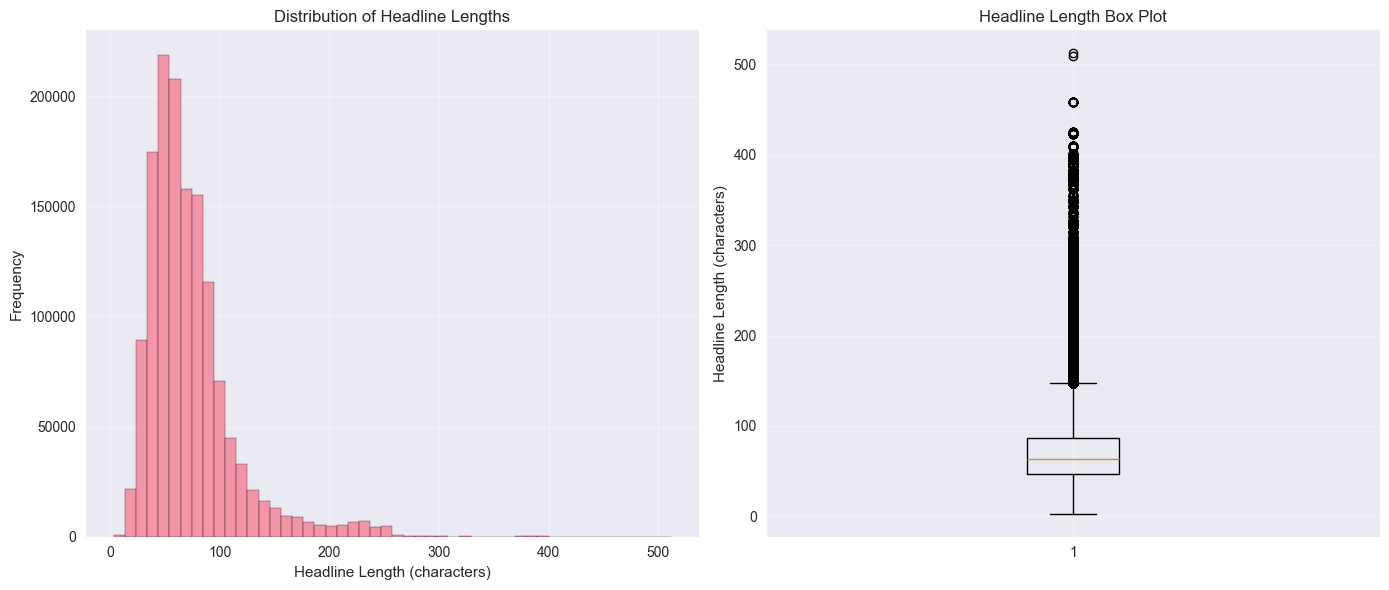

In [9]:
# Visualize headline length distribution
analyzer.plot_headline_length_distribution(figsize=(14, 6))